# **인구소멸지도로 살펴본 주요 백화점 입지 데이터**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

In [2]:
# 한글 폰트 깨짐 현상 해결
import matplotlib
import matplotlib.font_manager as fm
from matplotlib import rc
fm.get_fontconfig_fonts()

font_location = 'C:/Windows/Fonts/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location, size = 50).get_name()
matplotlib.rc('font', family = font_name)

---

## **대한민국 인구통계 정리**

In [3]:
population = pd.read_excel('05. population_raw_data.xlsx', header = 1)
population.fillna(method = 'ffill', inplace = True)

population.rename(columns = {'행정구역(동읍면)별(1)': '광역시도',
                            '행정구역(동읍면)별(2)': '시도',
                            '계': '인구수'}, inplace = True)

population = population[(population['시도'] != '소계')]

population.head()

,광역시도,시도,항목,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,총인구수 (명),152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자인구수 (명),75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자인구수 (명),77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,총인구수 (명),125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자인구수 (명),62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


In [4]:
population.is_copy = False

population.rename(columns = {'항목': '구분'}, inplace = True)

population.loc[population['구분'] == '총인구수 (명)', '구분'] = '합계'
population.loc[population['구분'] == '남자인구수 (명)', '구분'] = '남자'
population.loc[population['구분'] == '여자인구수 (명)', '구분'] = '여자'

population

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\generic.py:5079: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\generic.py:5080: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0
11,서울특별시,중구,여자,63045.0,4074.0,4737.0,5140,4886.0,3286.0,2908.0,2375,1573.0,846.0,337.0,102,109.0
12,서울특별시,용산구,합계,230241.0,14317.0,16972.0,19032,19127.0,10675.0,9093.0,7477,4553.0,2254.0,916.0,264,315.0
13,서울특별시,용산구,남자,111601.0,6937.0,8373.0,9455,9434.0,4834.0,3975.0,3094,1739.0,750.0,284.0,102,88.0
14,서울특별시,용산구,여자,118640.0,7380.0,8599.0,9577,9693.0,5841.0,5118.0,4383,2814.0,1504.0,632.0,162,227.0
15,서울특별시,성동구,합계,299259.0,20813.0,23383.0,25507,25979.0,12938.0,10734.0,7989,4450.0,1944.0,678.0,209,198.0


---

## **대한민국 연령대별 인구정리**

In [5]:
population['20-39세'] = population['20 - 24세'] + population['25 - 29세'] + \
                        population['30 - 34세'] + population['35 - 39세']

population['65세이상'] = population['65 - 69세'] + population['70 - 74세'] + \
                        population['75 - 79세'] + population['80 - 84세'] + \
                        population['85 - 89세'] + population['90 - 94세'] + \
                        population['95 - 99세'] + population['100+']

population.head(5)

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20-39세,65세이상
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0,44333.0,24950.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0,22222.0,10895.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0,22111.0,14055.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0,38184.0,20388.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0,19347.0,8852.0


In [6]:
pop = pd.pivot_table(population,
                    index = ['광역시도', '시도'],
                    columns = ['구분'],
                    values = ['인구수', '20-39세', '65세이상'])

pop.head()

20-39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                              
구분              여자        합계  
광역시도 시도                       
강원도  강릉시  107615.0  213846.0  
     고성군   14215.0   30114.0  
     동해시   46131.0   93297.0  
     삼척시   34346.0   69599.0  
     속초시   41505.0   81793.0

---

## **대한민국 인구소멸 비율 정리**

In [7]:
pop['소멸비율'] = pop['20-39세', '여자'] / (pop['65세이상', '합계'] / 2)
pop.head()

20-39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                                  소멸비율  
구분              여자        합계            
광역시도 시도                                 
강원도  강릉시  107615.0  213846.0  1.226041  
     고성군   14215.0   30114.0  0.707314  
     동해시   46131.0   93297.0  1.289738  
     삼척시   34346.0   69599.0  0.973990  
     속초시   41505.0   81793.0  1.372647

In [8]:
pop['소멸위기지역'] = pop['소멸비율'] < 1.0
pop.head()

20-39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                                  소멸비율 소멸위기지역  
구분              여자        합계                   
광역시도 시도                                        
강원도  강릉시  107615.0  213846.0  1.226041  False  
     고성군   14215.0   30114.0  0.707314   True  
     동해시   46131.0   93297.0  1.289738  False  
     삼척시   34346.0   69599.0  0.973990   True  
     속초시   41505.0   81793.0  1.372647  False

In [9]:
pop[pop['소멸위기지역'] == True].index.get_level_values(1)

Index(['고성군', '삼척시', '양양군', '영월군', '정선군', '평창군', '홍천군', '횡성군', '가평군', '양평군',
       '연천군', '거창군', '고성군', '남해군', '밀양시', '산청군', '의령군', '창녕군', '하동군', '함안군',
       '함양군', '합천군', '고령군', '군위군', '문경시', '봉화군', '상주시', '성주군', '영덕군', '영양군',
       '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '동구', '영도구',
       '강화군', '옹진군', '강진군', '고흥군', '곡성군', '구례군', '담양군', '보성군', '신안군', '영광군',
       '영암군', '완도군', '장성군', '장흥군', '진도군', '함평군', '해남군', '화순군', '고창군', '김제시',
       '남원시', '무주군', '부안군', '순창군', '임실군', '장수군', '정읍시', '진안군', '공주시', '금산군',
       '논산시', '보령시', '부여군', '서천군', '예산군', '청양군', '태안군', '홍성군', '괴산군', '단양군',
       '보은군', '영동군', '옥천군'],
      dtype='object', name='시도')

In [10]:
pop.reset_index(inplace = True)
pop.head()

광역시도   시도   20-39세                      65세이상                         인구수  \
구분                 남자       여자       합계       남자       여자       합계        남자   
0   강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
1   강원도  고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
2   강원도  동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
3   강원도  삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
4   강원도  속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                            소멸비율 소멸위기지역  
구분        여자        합계                   
0   107615.0  213846.0  1.226041  False  
1    14215.0   30114.0  0.707314   True  
2    46131.0   93297.0  1.289738  False  
3    34346.0   69599.0  0.973990   True  
4    41505.0   81793.0  1.372647  False

In [11]:
tmp_columns = [pop.columns.get_level_values(0)[n] + \
              pop.columns.get_level_values(1)[n]
              for n in range(0, len(pop.columns.get_level_values(0)))]

pop.columns = tmp_columns

pop.head()

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False


---

## **대한민국 행정구역 세분화**

In [12]:
si_name = [None] * len(pop)

tmp_gu_dict = {'수원': ['장안구', '권선구', '팔달구', '영통구'],
              '성남': ['수정구', '중원구', '분당구'],
              '안양': ['만안구', '동안구'],
              '안산': ['상록구', '단원구'],
              '고양': ['덕양구', '일산동구', '일산서구'],
              '용인': ['처인구', '기흥구', '수지구'],
              '청주': ['상당구', '서원구', '흥덕구', '청원구'],
              '천안': ['동남구', '서북구'],
              '전주': ['완산구', '덕진구'],
              '포항': ['남구', '북구'],
              '창원': ['의창구', '성산구', '진해구', '마산합포구', '마산회원구'],
              '부천': ['오정구', '원미구', '소사구']}

In [13]:
for n in pop.index:
    if pop['광역시도'][n][-3:] not in ['광역시', '특별시', '자치시']:
        if pop['시도'][n][:-1] == '고성' and pop['광역시도'][n] == '강원도':
            si_name[n] = '고성(강원)'
        elif pop['시도'][n][:-1] == '고성' and pop['광역시도'][n] == '경상남도':
            si_name[n] = '고성(경남)'
        else:
            si_name[n] = pop['시도'][n][:-1]
            
        for keys, values in tmp_gu_dict.items():
            if pop['시도'][n] in values:
                if len(pop['시도'][n]) == 2:
                    si_name[n] = keys + ' ' + pop['시도'][n]
                elif pop['시도'][n] in ['마산합포구', '마산회원구']:
                    si_name[n] = keys + ' ' + pop['시도'][n][2:-1]
                else:
                    si_name[n] = keys + ' ' + pop['시도'][n][:-1]
    
    elif pop['광역시도'][n] == '세종특별자치시':
        si_name[n] = '세종'
        
    else:
        if len(pop['시도'][n]) == 2:
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n]
        else:
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n][:-1]

In [14]:
si_name[0:6]

['강릉', '고성(강원)', '동해', '삼척', '속초', '양구']

In [15]:
pop['ID'] = si_name

In [16]:
del pop['20-39세남자']
del pop['65세이상남자']
del pop['65세이상여자']

pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초


---

## **대한민국 행정구역(시군구 구별) 시각화**

In [17]:
draw_korea_raw = pd.read_excel('05. draw_korea_raw.xlsx', encoding = 'EUC-KR')

draw_korea_raw.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN


In [18]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace = True)
draw_korea_raw_stacked.rename(columns = {'level_0': 'y', 'level_1': 'x', 0: 'ID'},
                             inplace = True)

draw_korea_raw_stacked.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [19]:
draw_korea = draw_korea_raw_stacked

In [20]:
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

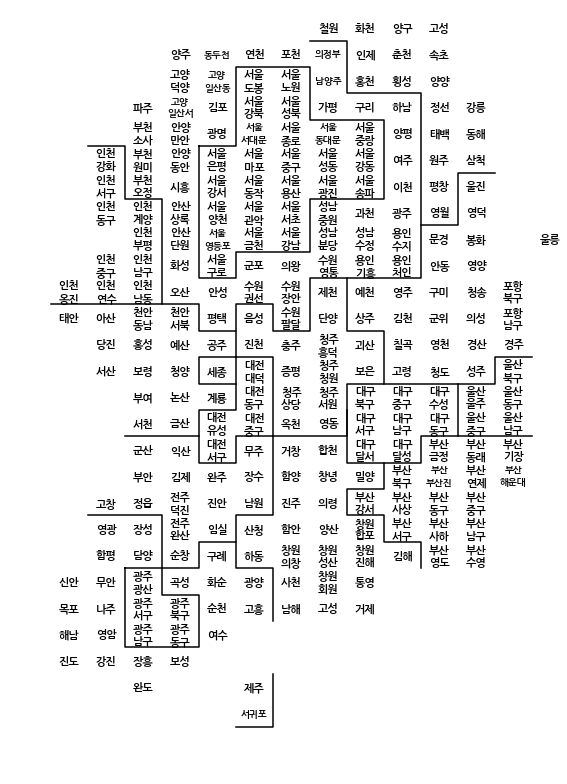

In [21]:
plt.figure(figsize = (8, 11))

# 지역 이름 표시
for idx, row in draw_korea.iterrows():
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다.
    if len(row['ID'].split()) == 2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2] == '고성':
        dispname = '고성'
    else:
        dispname = row['ID']
    
    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2
        
    plt.annotate(dispname, (row['x'] + 0.5, row['y'] + 0.5), weight = 'bold',
                fontsize = fontsize, ha = 'center', va = 'center', linespacing = linespacing)

# 시도 경계 그리기
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c = 'black', lw = 1.5)
    
plt.gca().invert_yaxis()

plt.axis('off')

plt.tight_layout()
plt.show()

In [22]:
tmp_list = list(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

for tmp in tmp_list:
    pop = pop.drop(pop[pop['ID']==tmp].index)
                       
print(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

set()

set()


set()

In [23]:
pop = pd.merge(pop, draw_korea, how='left', on=['ID'])

pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉,3,11
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원),0,10
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해,4,11
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척,5,11
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초,1,10


In [24]:
mapdata = pop.pivot_table(index='y', columns='x', values='인구수합계')
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
mapdata

x,0,1,2,3,4,5,6,7,8,9,10,11,12,13
y,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48013.0,26264.0,24010.0,30114.0,NaN,NaN,NaN
1,NaN,NaN,NaN,205513.0,98277.0,45907.0,154763.0,438457.0,32720.0,280707.0,81793.0,NaN,NaN,NaN
2,NaN,NaN,NaN,446233.0,292612.0,348220.0,567581.0,662154.0,70076.0,45991.0,27218.0,NaN,NaN,NaN
3,NaN,NaN,430781.000000,300839.0,363443.0,327195.0,450355.0,62448.0,193763.0,211101.0,38718.0,213846.0,NaN,NaN
4,NaN,NaN,283793.333333,252353.0,339484.0,314194.0,152737.0,355069.0,411005.0,111367.0,47070.0,93297.0,NaN,NaN
5,NaN,68010.0,283793.333333,345061.0,491476.0,379892.0,125249.0,299259.0,444168.0,111563.0,337979.0,69599.0,NaN,NaN
6,NaN,510733.0,283793.333333,402888.0,595485.0,400997.0,230241.0,357215.0,657831.0,210359.0,43318.0,51738.0,NaN,NaN
7,NaN,71014.0,330284.000000,375857.0,477739.0,506851.0,447192.0,237909.0,63778.0,327723.0,40073.0,39052.0,NaN,NaN
8,NaN,NaN,549716.000000,314002.0,370613.0,235386.0,567115.0,503830.0,232841.0,347833.0,74702.0,33539.0,NaN,10001.0


In [25]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - 
                                     min(blockedMap[targetData]))*0.25 + \
                                                                min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    
    for idx, row in blockedMap.iterrows():

        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']


        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)


    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

---

## **인구수합계 시각화**

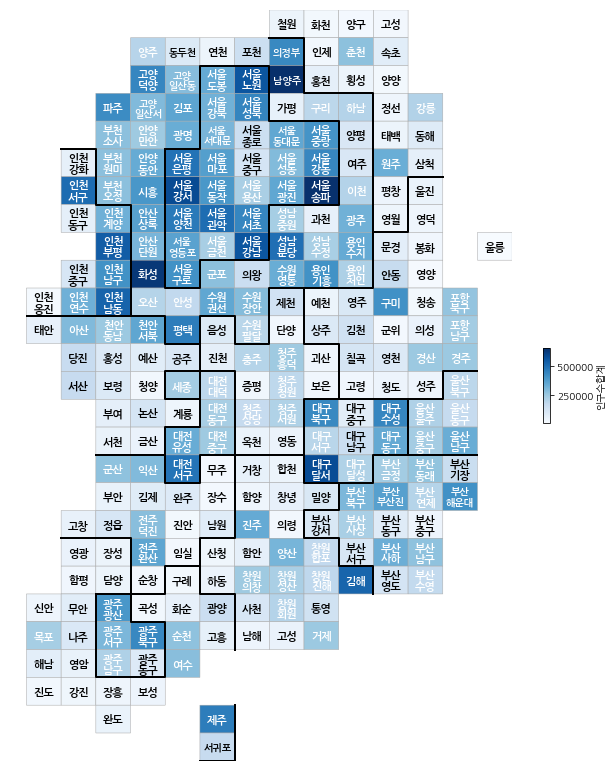

In [26]:
drawKorea('인구수합계', pop, 'Blues')

![image](https://user-images.githubusercontent.com/42408554/56012505-c9aa4e00-5d27-11e9-88af-385ccd58d55a.png)

---

## **소멸위기지역 시각화**

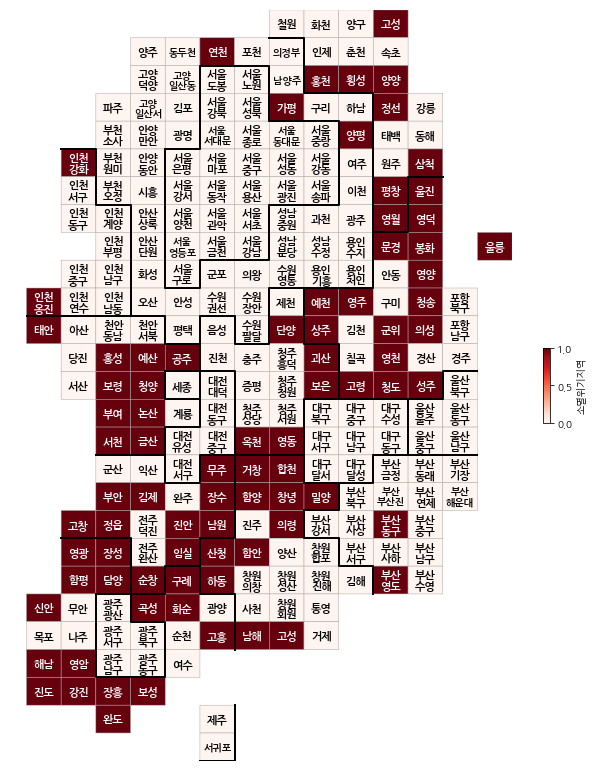

In [27]:
pop['소멸위기지역'] = [1 if con else 0 for con in pop['소멸위기지역']]
drawKorea('소멸위기지역', pop, 'Reds')

![image](https://user-images.githubusercontent.com/42408554/56012481-ab445280-5d27-11e9-881b-8100615bd359.png)

---

In [28]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = 20.

    datalabel = targetData

    tmp_max = max([ np.abs(min(blockedMap[targetData])), 
                                  np.abs(max(blockedMap[targetData]))])
    vmin, vmax = -tmp_max, tmp_max

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

---

## **여성비율 시각화**

* **여성인구 전체**

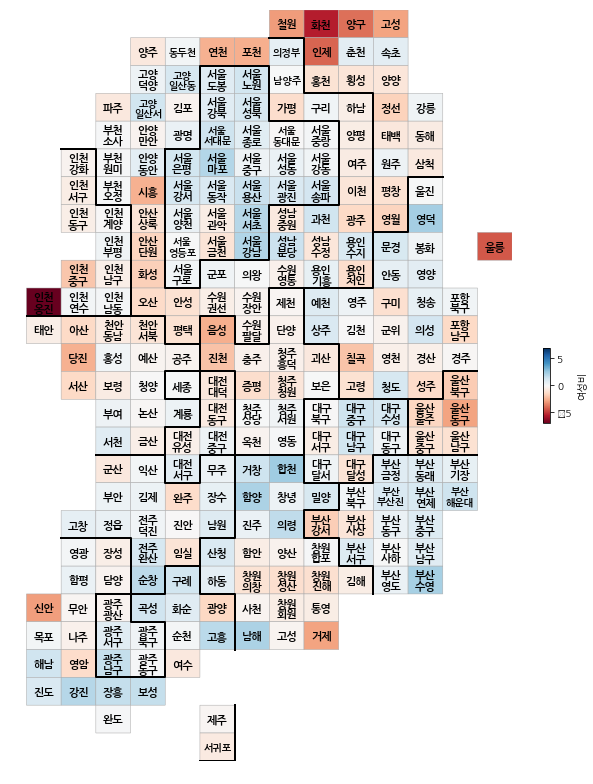

In [29]:
pop['여성비'] = (pop['인구수여자'] / pop['인구수합계'] - 0.5) * 100
drawKorea('여성비', pop, 'RdBu')

![image](https://user-images.githubusercontent.com/42408554/56012524-d8910080-5d27-11e9-9aa8-41c0e42ffd36.png)

* **20대 ~ 30대 여성비율 시각화**

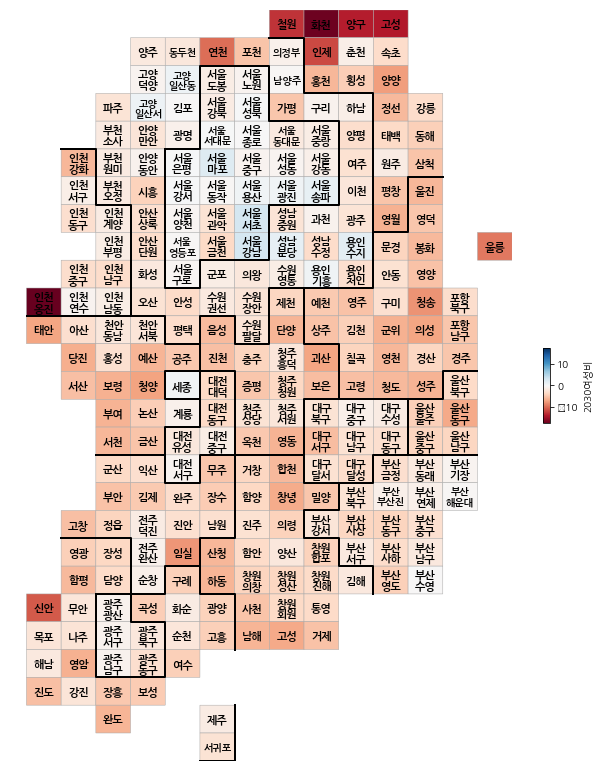

In [30]:
pop['2030여성비'] = (pop['20-39세여자'] / pop['20-39세합계'] - 0.5) * 100
drawKorea('2030여성비', pop, 'RdBu')

![image](https://user-images.githubusercontent.com/42408554/56012541-e6df1c80-5d27-11e9-835c-96785e48fc02.png)

---

In [31]:
pop_folium = pop.set_index('ID')
pop_folium.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,y,x,여성비,2030여성비
ID,,,,,,,,,,,,,,
강릉,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,0,3,11,0.323597,-3.227766
고성(강원),강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,1,0,10,-2.796042,-13.989748
동해,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,0,4,11,-0.554680,-4.133747
삼척,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,1,5,11,-0.651590,-5.033812
속초,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,0,1,10,0.743951,-3.217875


---

## **대한민국 실제 행정구역 인구구성 시각화**

In [32]:
import folium
import json
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [33]:
geo_path = '05. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_str,
               data = pop_folium['인구수합계'],
               columns = [pop_folium.index, pop_folium['인구수합계']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id')

map

![image](https://user-images.githubusercontent.com/42408554/56012561-ffe7cd80-5d27-11e9-9af3-10e639d978d6.png)

In [34]:
map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_str,
               data = pop_folium['소멸위기지역'],
               columns = [pop_folium.index, pop_folium['소멸위기지역']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')

map